In [1]:
! git clone https://github.com/shane200195/Stock_ml.git

Cloning into 'Stock_ml'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (513/513), done.
remote: Compressing objects: 100% (512/512), done.
remote: Total 513 (delta 1), reused 513 (delta 1), pack-reused 0
Receiving objects: 100% (513/513), 14.94 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
! ls

sample_data  Stock_ml


In [0]:
import pandas as pd
import numpy as np

sp500 = pd.read_csv("Stock_ml/sp500.csv")

sp500.replace([np.inf, -np.inf], np.nan)
sp500.fillna(1, inplace=True)




#selecting the features that we want to use
features = sp500.columns[3:]
x = sp500.loc[:,features].values
#selecting the target that will be used to classify a particular state
target = sp500['result']

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [0]:
principalDf = pd.DataFrame(data = principal_components
             , columns = ['component 1', 'component 2'])

finalDf = pd.concat([principalDf, target], axis = 1)

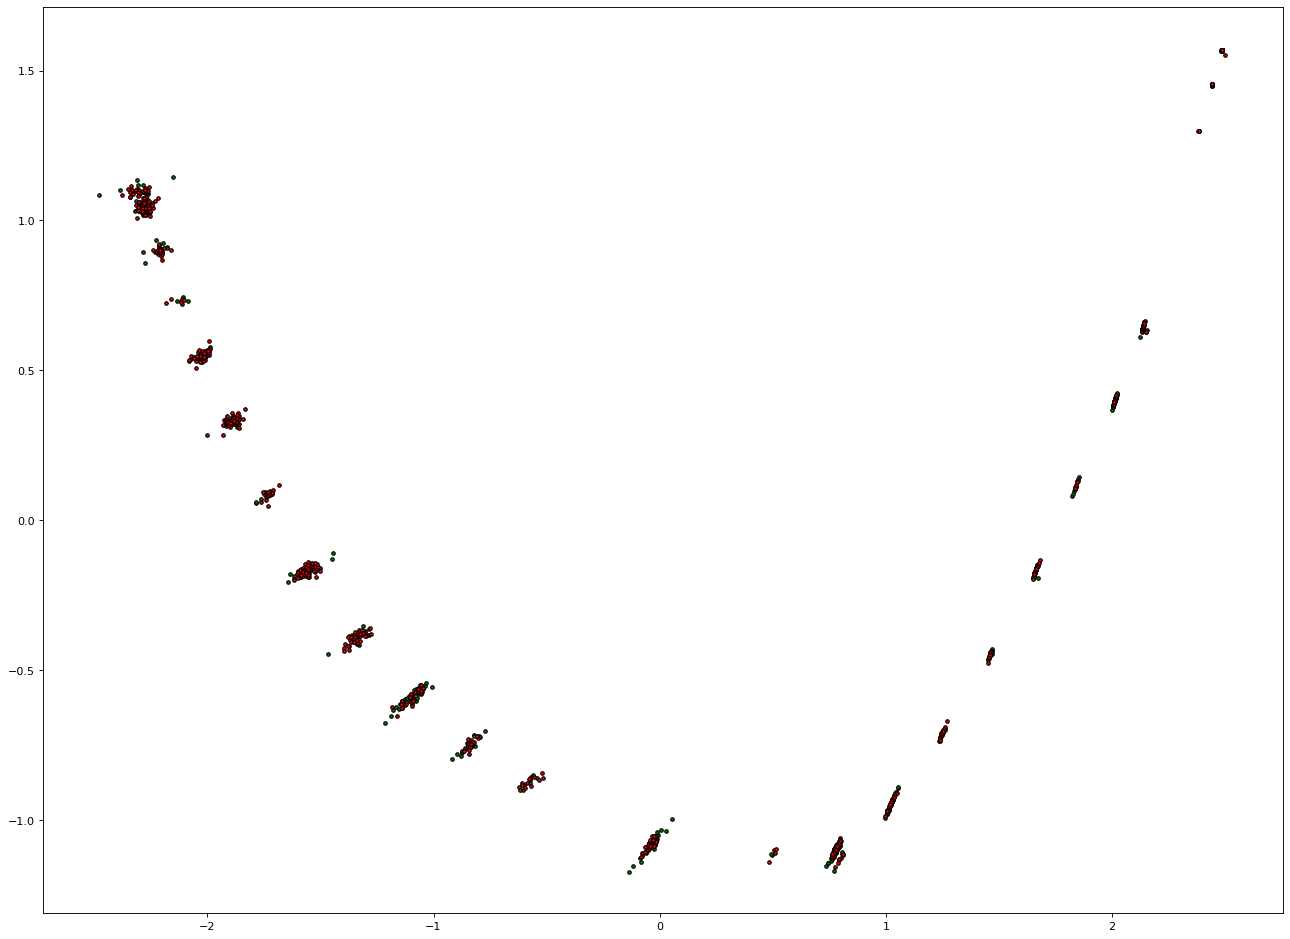

In [64]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
targets = [1, 0]
colors = ['g', 'r']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['result'] == target
  plt.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 10, edgecolor="k")
# plt.scatter(principalDf["component 1"], principalDf["component 2"])
plt.show()
